**<center><span style="font-size:30px; font-family:Courier New;">EXPLORATORY DATA ANALYSIS</span></center>**
***

# Notebook Setup

## Importing Necessary Libraries

In [179]:
# for data manipulation and analysis
import pandas as pd

# for high-performance multi-dimensional arrays and mathematical functions
import numpy as np

# for creating static, animated, and interactive visualizations
import matplotlib.pyplot as plt

# for creating attractive and informative statistical graphics
import seaborn as sns

# checking if all libraries imported successfully or not
print("Imported Successfully!")

Imported Successfully!


## Loading Dataset

In [180]:
# loading the dataset
traffic = pd.read_csv('/kaggle/input/website-traffic/website_wata.csv')

# checking if dataset has loaded successfully
print("Dataset Loaded Successfully!")

Dataset Loaded Successfully!


## Data Summary

* Total Records: 2000
* Total Attributes: 7
* Categorical Column(s): 1
* Numerical Column(s): 6

## Dataset Description
* Page Views: The number of pages viewed during a session.
* Session Duration: The total duration of the session in minutes.
* Bounce Rate: The percentage of visitors who navigate away from the site after viewing only one page.
* Traffic Source: The origin of the traffic (e.g., Organic, Social, Paid).
* Time on Page: The amount of time spent on the specific page.
* Previous Visits: The number of previous visits by the same visitor.
* Conversion Rate: The percentage of visitors who completed a desired action (e.g., making a purchase).

# Skimming Dataset

In [181]:
# going through data's top rows
traffic.head()

,Page Views,Session Duration,Bounce Rate,Traffic Source,Time on Page,Previous Visits,Conversion Rate
0,5,11.051381,0.230652,Organic,3.890460,3,1.0
1,4,3.429316,0.391001,Social,8.478174,0,1.0
2,4,1.621052,0.397986,Organic,9.636170,2,1.0
3,5,3.629279,0.180458,Organic,2.071925,3,1.0
4,5,4.235843,0.291541,Paid,1.960654,5,1.0


In [182]:
# going through data's top rows
traffic.tail()

,Page Views,Session Duration,Bounce Rate,Traffic Source,Time on Page,Previous Visits,Conversion Rate
1995,1,2.724513,0.207187,Referral,1.324206,2,1.0
1996,3,0.392856,0.095559,Organic,3.824416,1,1.0
1997,4,9.899823,0.446622,Organic,1.288675,1,1.0
1998,3,0.393319,0.278340,Paid,5.037584,2,1.0
1999,3,0.882638,0.338026,Direct,5.186908,3,1.0


# Descriptive Analysis

In [183]:
# statistical skimming of dataset
traffic.describe()

,Page Views,Session Duration,Bounce Rate,Time on Page,Previous Visits,Conversion Rate
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,4.950500,3.022045,0.284767,4.027439,1.978500,0.982065
std,2.183903,3.104518,0.159781,2.887422,1.432852,0.065680
min,0.000000,0.003613,0.007868,0.068515,0.000000,0.343665
25%,3.000000,0.815828,0.161986,1.935037,1.000000,1.000000
50%,5.000000,1.993983,0.266375,3.315316,2.000000,1.000000
75%,6.000000,4.197569,0.388551,5.414627,3.000000,1.000000
max,14.000000,20.290516,0.844939,24.796182,9.000000,1.000000


# Data Exploration

In [184]:
# examining dataset's shape
traffic.shape

(2000, 7)

In [185]:
# going through data's basic information
traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Page Views        2000 non-null   int64  
 1   Session Duration  2000 non-null   float64
 2   Bounce Rate       2000 non-null   float64
 3   Traffic Source    2000 non-null   object 
 4   Time on Page      2000 non-null   float64
 5   Previous Visits   2000 non-null   int64  
 6   Conversion Rate   2000 non-null   float64
dtypes: float64(4), int64(2), object(1)
memory usage: 109.5+ KB


In [186]:
# finding null values
traffic.isnull().sum()

Page Views          0
Session Duration    0
Bounce Rate         0
Traffic Source      0
Time on Page        0
Previous Visits     0
Conversion Rate     0
dtype: int64

In [187]:
# examining unique values of dataset
traffic.nunique()

Page Views            15
Session Duration    2000
Bounce Rate         2000
Traffic Source         5
Time on Page        2000
Previous Visits       10
Conversion Rate      228
dtype: int64

In [188]:
# finding value count of '1.0' in CONVERSION RATE column
con_count = traffic['Conversion Rate'].value_counts().get(1.0, 0)

# printing value count
con_count

1773

# Examining Outliers

In [189]:
# creating new dataset without categorical column
traffic_num = traffic.drop('Traffic Source', axis=1)

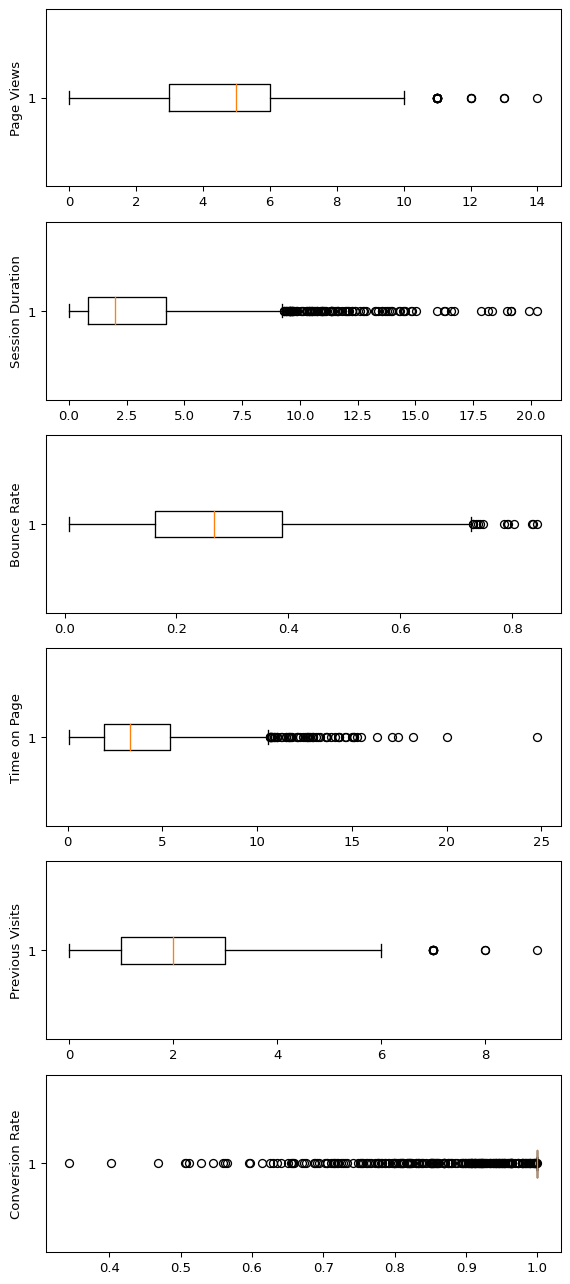

In [190]:
# creating a box plot
fig, axs = plt.subplots(6,1,dpi=95, figsize=(7,17))
i = 0
for col in traffic_num.columns:
	axs[i].boxplot(traffic_num[col], vert=False)
	axs[i].set_ylabel(col)
	i+=1
plt.show()

# Dropping Outliers

In [191]:
# COLUMN: Page Views

# identify the quartiles
q1, q3 = np.percentile(traffic['Page Views'], [25, 75])

# calculate the interquartile range
iqr = q3 - q1

# calculate the lower and upper bounds
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)

# drop the outliers
traffic_clean = traffic[(traffic['Page Views'] >= lower_bound) & (traffic['Page Views'] <= upper_bound)]


# COLUMN: Session Duration

# identify the quartiles
q1, q3 = np.percentile(traffic['Session Duration'], [25, 75])

# calculate the interquartile range
iqr = q3 - q1

# calculate the lower and upper bounds
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)

# drop the outliers
traffic_clean = traffic[(traffic['Session Duration'] >= lower_bound) & (traffic['Session Duration'] <= upper_bound)]


# COLUMN: Bounce Rate

# identify the quartiles
q1, q3 = np.percentile(traffic['Bounce Rate'], [25, 75])

# calculate the interquartile range
iqr = q3 - q1

# calculate the lower and upper bounds
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)

# drop the outliers
traffic_clean = traffic[(traffic['Bounce Rate'] >= lower_bound) & (traffic['Bounce Rate'] <= upper_bound)]


# COLUMN: Time on Page

# identify the quartiles
q1, q3 = np.percentile(traffic['Time on Page'], [25, 75])

# calculate the interquartile range
iqr = q3 - q1

# calculate the lower and upper bounds
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)

# drop the outliers
traffic_clean = traffic[(traffic['Time on Page'] >= lower_bound) & (traffic['Time on Page'] <= upper_bound)]


# COLUMN: Previous Visits

# identify the quartiles
q1, q3 = np.percentile(traffic['Previous Visits'], [25, 75])

# calculate the interquartile range
iqr = q3 - q1

# calculate the lower and upper bounds
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)

# drop the outliers
traffic_clean = traffic[(traffic['Previous Visits'] >= lower_bound) & (traffic['Previous Visits'] <= upper_bound)]



# COLUMN: Conversion Rate

# identify the quartiles
q1, q3 = np.percentile(traffic['Conversion Rate'], [25, 75])

# calculate the interquartile range
iqr = q3 - q1

# calculate the lower and upper bounds
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)

# drop the outliers
traffic_clean = traffic[(traffic['Conversion Rate'] >= lower_bound) & (traffic['Conversion Rate'] <= upper_bound)]

# checking if outliershave been dropped successfully
print("Dropped outliers successfully!")

Dropped outliers successfully!


# Examining Correlations

In [192]:
# dropping categorical column from outlier-free dataset
traffic_clean_num = traffic_clean.drop('Traffic Source', axis=1)

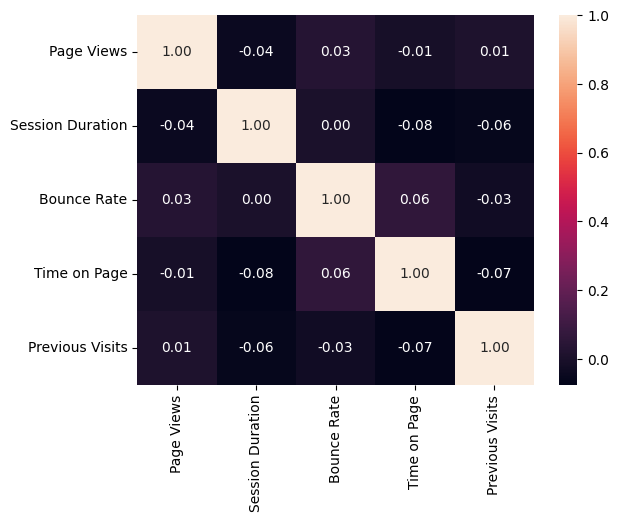

In [193]:
# creating a heatmap and dropping CONVERSION RATE column in it as it can't be visualized
corr = traffic_clean_num.drop('Conversion Rate', axis=1).corr()
plt.figure(dpi=100)
sns.heatmap(corr, annot=True, fmt= '.2f')
plt.show()

# Data Visualizations

## Traffic Source Distribution

In [194]:
# examining TRAFFIC SOURCE value counts
traffic_counts = traffic_clean['Traffic Source'].value_counts()

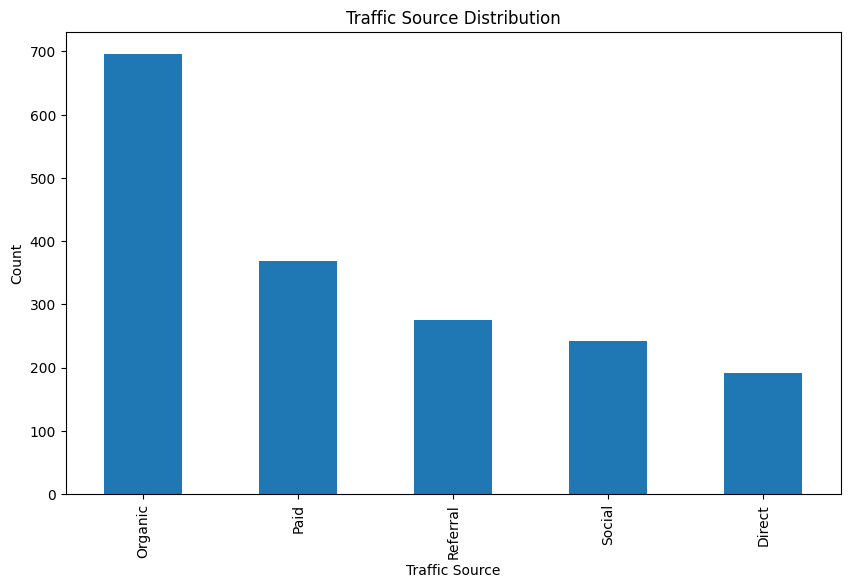

In [195]:
# creating a bar graph
traffic_counts.plot(kind='bar', figsize=(10, 6))
plt.title('Traffic Source Distribution')
plt.xlabel('Traffic Source')
plt.ylabel('Count')
plt.show()

## Relationship Between Session Duration And Bounce Rate

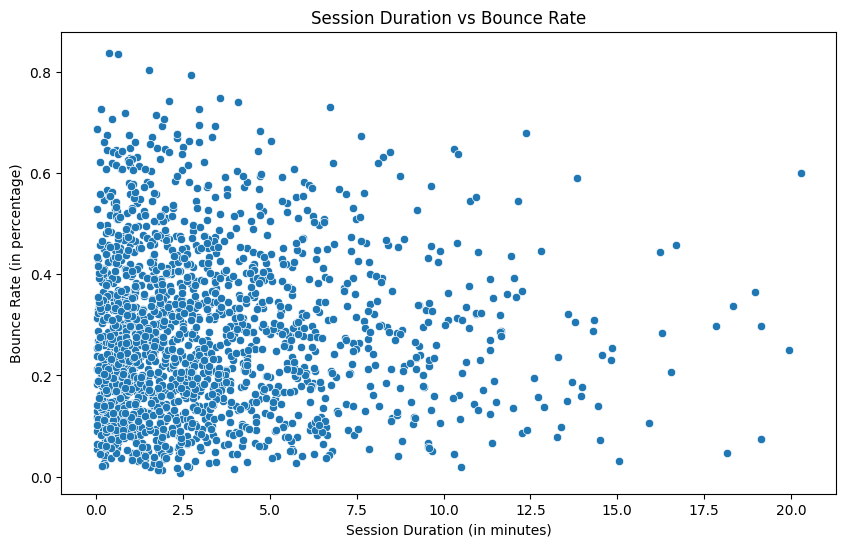

In [196]:
# creating a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Session Duration', y='Bounce Rate', data=traffic_clean_num)
plt.title('Session Duration vs Bounce Rate')
plt.xlabel('Session Duration (in minutes)')
plt.ylabel('Bounce Rate (in percentage)')
plt.show()

## Relationship Between Page Views And Session Duration

In [197]:
# creating new variables for data visualization
page_views = traffic_clean_num['Page Views']
session_duration = traffic_clean_num['Session Duration']

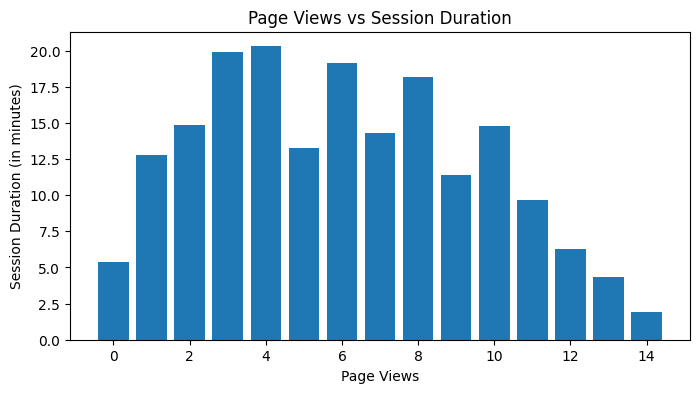

In [198]:
# creating a bargraph
plt.figure(figsize=(8, 4))
plt.bar(page_views, session_duration)
plt.title('Page Views vs Session Duration')
plt.xlabel('Page Views')
plt.ylabel('Session Duration (in minutes)')
plt.show()

## Relationship Between Time On Page And Conversion Rate

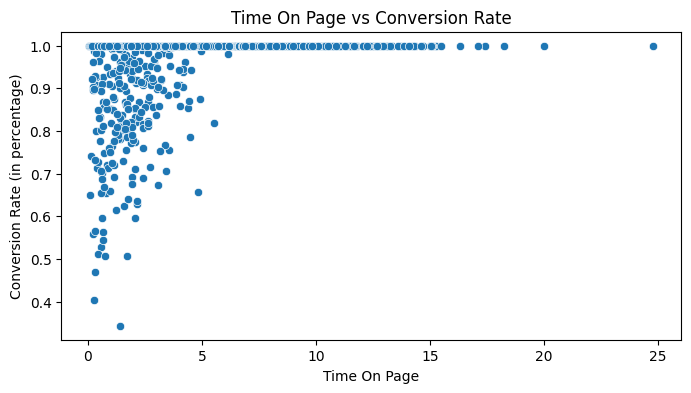

In [199]:
# creating a scatter plot
plt.figure(figsize=(8,4))
sns.scatterplot(x='Time on Page', y='Conversion Rate', data=traffic)
plt.title('Time On Page vs Conversion Rate')
plt.xlabel('Time On Page')
plt.ylabel('Conversion Rate (in percentage)')
plt.show()

## Relationship Between Time On Page And Bounce Rate

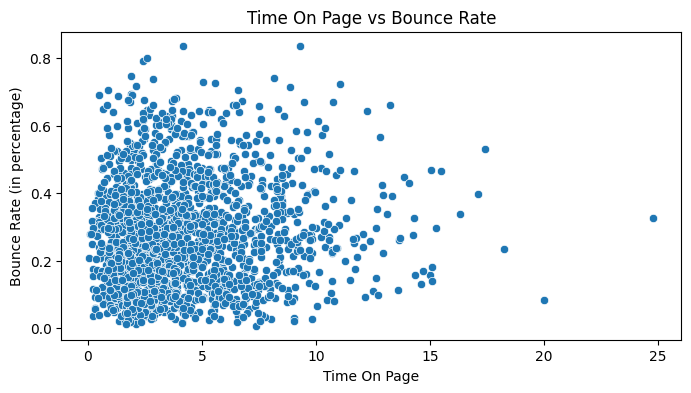

In [200]:
# creating a scatter plot
plt.figure(figsize=(8,4))
sns.scatterplot(x='Time on Page', y='Bounce Rate', data=traffic_clean_num)
plt.title('Time On Page vs Bounce Rate')
plt.xlabel('Time On Page')
plt.ylabel('Bounce Rate (in percentage)')
plt.show()

# Conclusion

* The dataset 'Website Traffic' is about 'Website Traffic and User Engagement Metrics'.
* As per the data source, the data is genrated and is not from a real website.
* The dataset have:
    * Total Rows: 2000
    * Total Columns: 7
    * Categorical Column(s): 1
    * Numerical Column(s): 6
* There are user engagement metrices of 1999 users.
* The dataset doesn't have any null values.
* The dataset have following datatypes respectively:
    * Page Views            int64
    * Session Duration    float64
    * Bounce Rate         float64
    * Traffic Source       object
    * Time on Page        float64
    * Previous Visits       int64
    * Conversion Rate     float64
* The dataset is a well-maintained and clean, thus, it doesn't require much data cleaning.
* The maximum number of pages viewd during a session are 14, whereas the least is 0 pages.
* There are 5 types of Traffic Sources in the dataset.
* 1773 users, out of 1999, who converted from a vistor to a buyer.
* There were several outliers in all the numerical columns, which were removed.
* The status of correlations between various variables is as follows:
    * There is zero correlation between Session Duration and Bounce Rate.
    * There is no very strong positive or very strong negative correlation in the entire dataset.
* Most of the traffic on website is 'Organic' and least traffic is 'Direct'.
* The 'Relationship Between Session Duration And Bounce Rate' data visualization doesn't convey any insights as there is no correlation between the two at all.
* The 'Relationship Between  Time On Page And Bounce Rate' data visualization doesn't convey any insights as there is no important correlation between the two.
* The 'Relationship Between  Page Views and Session Duration' data visualization doesn't convey any insights as there is a very random pattern of trends in it.
* As per the 'Relationship Between Time On Page And Conversion Rate' dataviz, users who are on a specific website page for 5 to 15 minutes are most likely to be converted from a visitor to a buyer.

# Next Steps

The EDA of 'Website Traffic' suggested that subsequent data analysis or model development should consider:
* Investigating dataset integrity for causations and duplicates.
* Assessing column proportionality.
* Identifying and handling unwanted observations.
* Selecting appropriate features and target variables.
* Choosing suitable modeling algorithms.
* Scaling features (if necessary).